수익률계산

In [ ]:
df_get=pd.read_csv('수익률 계산.csv')

In [ ]:
df_get

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2024-04-22 09:00:00+09:00,77400.0,77400.0,77200.0,77300.0,77300.0,0
1,2024-04-22 09:01:00+09:00,77300.0,77400.0,77100.0,77200.0,77200.0,337409
2,2024-04-22 09:02:00+09:00,77100.0,77200.0,77000.0,77100.0,77100.0,267021
3,2024-04-22 09:03:00+09:00,77000.0,77200.0,77000.0,77100.0,77100.0,218955
4,2024-04-22 09:04:00+09:00,77100.0,77100.0,76800.0,76800.0,76800.0,284661
...,...,...,...,...,...,...,...
1793,2024-04-26 14:54:00+09:00,76800.0,76800.0,76700.0,76700.0,76700.0,8382
1794,2024-04-26 14:55:00+09:00,76800.0,76800.0,76700.0,76800.0,76800.0,15591
1795,2024-04-26 14:57:00+09:00,76800.0,76800.0,76700.0,76800.0,76800.0,22806
1796,2024-04-26 14:58:00+09:00,76700.0,76800.0,76700.0,76800.0,76800.0,16832


결측치 처리

In [ ]:
df_get=pd.concat([df_get.iloc[:210], pd.DataFrame([df_get.iloc[210]]), df_get.iloc[210:]]).reset_index(drop=True)
df_get=pd.concat([df_get.iloc[:1795], pd.DataFrame([df_get.iloc[1795]]), df_get.iloc[1795:]]).reset_index(drop=True)

예측 데이터셋 생성

In [ ]:
df_pred=df_get.iloc[::60,:]

모델 학습

In [ ]:
stock.df=df_pred.copy()

In [ ]:
stock.preprocessing()

,Open,High,Low,Close,Volume
Datetime,,,,,
2024-04-22 09:00:00,77400.0,77400.0,77200.0,77300.0,0
2024-04-22 10:00:00,76400.0,76400.0,76200.0,76300.0,271051
2024-04-22 11:00:00,76200.0,76200.0,76100.0,76200.0,30577
2024-04-22 12:00:00,75700.0,75800.0,75700.0,75800.0,20634
2024-04-22 13:00:00,75700.0,75700.0,75600.0,75700.0,26315
2024-04-22 14:00:00,75600.0,75700.0,75600.0,75700.0,17199
2024-04-23 09:00:00,76400.0,76700.0,76300.0,76700.0,1220923
2024-04-23 10:00:00,76600.0,76600.0,76500.0,76600.0,10481
2024-04-23 11:00:00,76100.0,76200.0,76100.0,76100.0,8237


In [ ]:
stock.add_change(stock.df.columns)

,Open,High,Low,Close,Volume,Open_chg,High_chg,Low_chg,Close_chg,Volume_chg
Datetime,,,,,,,,,,
2024-04-22 10:00:00,76400.0,76400.0,76200.0,76300.0,271051,-0.012920,-0.012920,-0.012953,-0.012937,inf
2024-04-22 11:00:00,76200.0,76200.0,76100.0,76200.0,30577,-0.002618,-0.002618,-0.001312,-0.001311,-0.887191
2024-04-22 12:00:00,75700.0,75800.0,75700.0,75800.0,20634,-0.006562,-0.005249,-0.005256,-0.005249,-0.325179
2024-04-22 13:00:00,75700.0,75700.0,75600.0,75700.0,26315,0.000000,-0.001319,-0.001321,-0.001319,0.275322
2024-04-22 14:00:00,75600.0,75700.0,75600.0,75700.0,17199,-0.001321,0.000000,0.000000,0.000000,-0.346418
2024-04-23 09:00:00,76400.0,76700.0,76300.0,76700.0,1220923,0.010582,0.013210,0.009259,0.013210,69.988023
2024-04-23 10:00:00,76600.0,76600.0,76500.0,76600.0,10481,0.002618,-0.001304,0.002621,-0.001304,-0.991416
2024-04-23 11:00:00,76100.0,76200.0,76100.0,76100.0,8237,-0.006527,-0.005222,-0.005229,-0.006527,-0.214102
2024-04-23 12:00:00,76100.0,76100.0,76000.0,76100.0,6358,0.000000,-0.001312,-0.001314,0.000000,-0.228117


In [ ]:
stock.scale_col(stock.df.columns[[3,0,1,2,4]])

In [ ]:
test_loader=stock.data_loader(4, 't')

In [ ]:
stock.model.load_state_dict(torch.load('close.pth'))

<All keys matched successfully>

In [ ]:
stock.train(train_loader, valid_loader, test_loader, 7, 0.001, 80, 'test')

Average Test Loss: 0.104620979167521


c:\Users\horri\anaconda3\envs\pytorch\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\horri\anaconda3\envs\pytorch\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([9])) that is different to the input size (torch.Size([9, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
pred, act=stock.pred_value()

In [ ]:
stock.diff()

최대 :  [1500.] 최소 :  [0.] 평균:  [616.]


결과는 아쉬움..

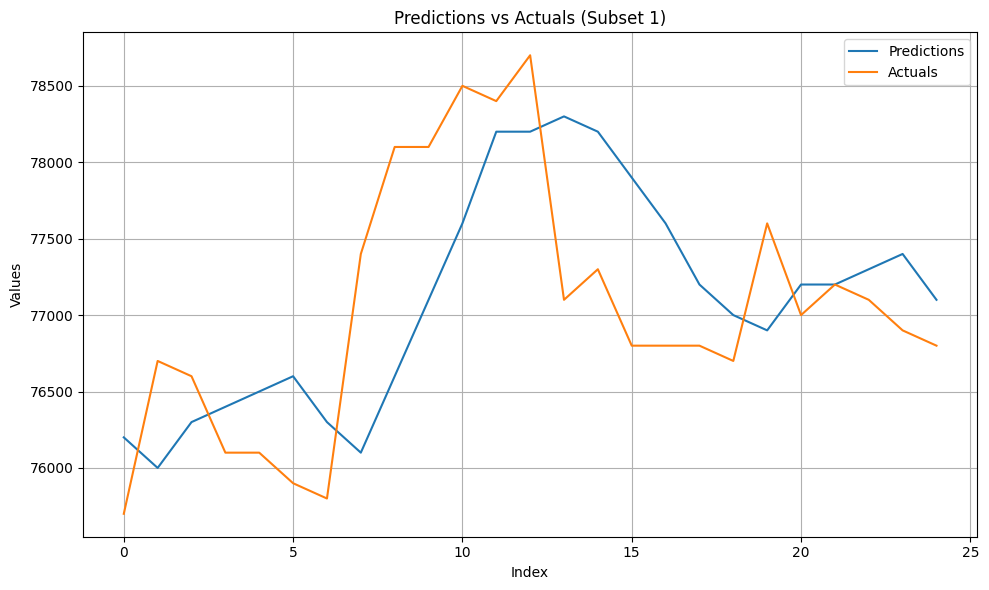

In [ ]:
stock.show('origin')

이동평균선 추가

In [ ]:
df_get['4H_MA'] = df_get['Close'].rolling(window=4).mean()
df_get['8H_MA'] = df_get['Close'].rolling(window=8).mean()

모델이 예측한 뒤의 25개의 값만 남김

In [ ]:
df_get=df_get.iloc[300:,]

예측결과 추가

In [ ]:
df_get['pred']=[item for item in pred for _ in range(60)]

C:\Users\horri\AppData\Local\Temp\ipykernel_18792\2763114686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_get['pred']=[item for item in pred for _ in range(60)]


수익률 계산 코드

In [ ]:
# 매매 신호 생성
df_get.loc[:,'Signal'] = np.where(df_get['4H_MA'] >= df_get['8H_MA'], 1, 0)
df_get.loc[:,'Signal2'] = np.where(df_get['pred']>=df_get['Open'], 1, 0)

# 수익률 계산
df_get.loc[:,'Returns'] = df_get['Close'] - df_get['Close'].shift(1)
df_get.loc[:,'Strategy'] = df_get['Signal'] * df_get['Returns'] * df_get['Signal2']
cumulative_returns = df_get['Strategy'].sum()

In [ ]:
# 최종 수익률 출력
print(f"Cumulative returns: {cumulative_returns}")
print(f'Percent: {cumulative_returns/df.iloc[0,4]}')

Cumulative returns: 1400.0
Percent: 0.020378457059679767


In [ ]:
buy_hold=df_get.iloc[-1, 4]-df_get.iloc[0, 4]
print(buy_hold) # buy & hold
print(f'Percent: {buy_hold/df.iloc[0,4]}')

1100.0
Percent: 0.01601164483260553
